In [1]:
!pip install langchainhub
!pip install langchain-openai
!pip install langchain
!pip install beautifulsoup4
!pip install langchain-community
!pip install faiss-cpu
!pip install -U langchain-community tavily-python
!pip install gradio_client==0.2.10
!pip install gradio==3.38.0


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   --------------------------------- ------ 2.1/2.5 MB 16.0 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 13.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 19.5 MB/s eta 0:00:00

  Attempting uninstall: langchain-core

    Found existing installation: langchain-core 0.3.79

    Uninstalling langchain-core-0.3.79:

      Successfully uninstalled langchain-core-0.3.79

   ---------------------------------------- 0/4 [langchain-core]
   ---------------------------------------- 0/4 [langchain-core]
   ---------------------------------------- 0/4 [langchain-core]
  Attempting uninstall: langchain-text-splitters
   ---------------------------------------- 0/4 [langchain-core]
    Found existing installation: langchain-text-splitters 0.3.11
   ---------------------------------------- 0/4 [langchain-core]


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.0 which is incompatible.
langchain 0.3.27 requires langchain-text-splitters<1.0.0,>=0.3.9, but you have langchain-text-splitters 1.0.0 which is incompatible.
langchain-openai 0.3.35 requires langchain-core<1.0.0,>=0.3.78, but you have langchain-core 1.0.0 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


^C
  Using cached gradio-3.38.0-py3-none-any.whl.metadata (17 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached fastapi-0.119.0-py3-none-any.whl.metadata (28 kB)
  Using cached ffmpy-0.6.3-py3-none-any.whl.metadata (2.9 kB)
  Using cached MarkupSafe-2.1.5.tar.gz (19 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached mdit_py_plugins-0.3.3-py3-none-any.whl.metadata (2.8 kB)
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build whee

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-chroma 1.0.0 requires numpy>=2.1.0; python_version >= "3.13", but you have numpy 1.26.4 which is incompatible.
langchain-community 0.4 requires numpy>=2.1.0; python_version >= "3.13", but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import getpass
import os
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI
from langchain.chains import create_retrieval_chain

SyntaxError: invalid syntax (3994141918.py, line 6)

In [3]:
os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


In [4]:
os.environ["TAVILY_API_KEY"] = getpass.getpass()

··········


# Setup the retriver

In [5]:
from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader("https://docs.smith.langchain.com/")

docs = loader.load()

In [6]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

In [7]:
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter()
documents = text_splitter.split_documents(docs)
vector = FAISS.from_documents(documents, embeddings)

In [8]:
from langchain.chains.combine_documents import create_stuff_documents_chain
# create_stuff_documents_chain :
#  Create a chain for passing a list of Documents to a model.

llm = ChatOpenAI(api_key=os.environ["OPENAI_API_KEY"])
output_parser = StrOutputParser()

prompt = ChatPromptTemplate.from_template("""Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""", output_parser = output_parser)

document_chain = create_stuff_documents_chain(llm, prompt) # prompt | llm

In [9]:
retriever = vector.as_retriever()
retrieval_chain = create_retrieval_chain(retriever, document_chain)

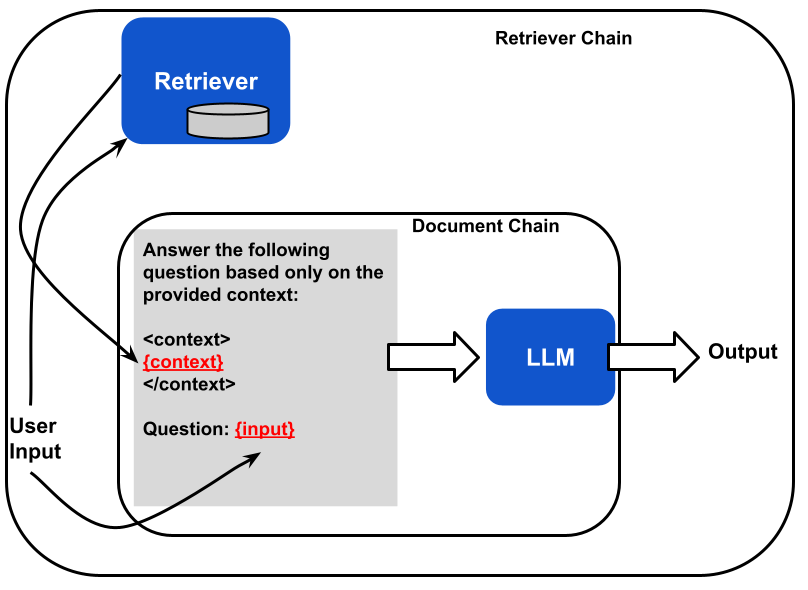

In [10]:
retrieval_chain.invoke({"input": "What is LangSmith?"})

{'input': 'What is LangSmith?',
 'context': [Document(id='9684abbf-7aa8-49b4-ab2c-6767a3833cc0', metadata={'source': 'https://docs.smith.langchain.com/', 'title': 'Get started with LangSmith - Docs by LangChain', 'language': 'en'}, page_content='Get started with LangSmith - Docs by LangChainOur new LangChain Academy course on Deep Agents is now live! Enroll for free.Docs by LangChain home pagePythonSearch...⌘KLangSmithPlatform for LLM observability and evaluationOverviewQuickstartsTrace an applicationEvaluate an applicationTest promptsAPI & SDKsAPI referencePython SDKJS/TS SDKPricingPlansPricing FAQOur new LangChain Academy course on Deep Agents is now live! Enroll for free.Docs by LangChain home pagePythonSearch...⌘KGitHubForumForumSearch...NavigationGet started with LangSmithGet startedObservabilityEvaluationPrompt engineeringSelf-hostingAdministrationGet startedObservabilityEvaluationPrompt engineeringSelf-hostingAdministrationGitHubForumGet started with LangSmithCopy pageCopy pageL

# Agents

In [11]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "langsmith_search",
    "Search for information about LangSmith. For any questions about LangSmith, you must use this tool!",
)

# langsmith_search: Search for information about LangSmith. For any questions about LangSmith, you must use this tool!

In [12]:
from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults()

/tmp/ipython-input-2722338889.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  search = TavilySearchResults()


In [13]:
print(search.description)
print(search.name)

A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.
tavily_search_results_json


In [14]:
tools = [retriever_tool, search]

In [15]:
from langchain_openai import ChatOpenAI
from langchain import hub
from langchain.agents import create_openai_functions_agent
from langchain.agents import AgentExecutor

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")

# You need to set OPENAI_API_KEY environment variable or pass it as argument `api_key`.
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
agent = create_openai_functions_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [16]:
print(prompt)

input_variables=['agent_scratchpad', 'input'] optional_variables=['chat_history'] input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')]

In [17]:
result = agent_executor.invoke({"input": "how can langsmith help with testing?"})



> Entering new AgentExecutor chain...

Invoking: `langsmith_search` with `{'query': 'how can LangSmith help with testing'}`


Get started with LangSmith - Docs by LangChainOur new LangChain Academy course on Deep Agents is now live! Enroll for free.Docs by LangChain home pagePythonSearch...⌘KLangSmithPlatform for LLM observability and evaluationOverviewQuickstartsTrace an applicationEvaluate an applicationTest promptsAPI & SDKsAPI referencePython SDKJS/TS SDKPricingPlansPricing FAQOur new LangChain Academy course on Deep Agents is now live! Enroll for free.Docs by LangChain home pagePythonSearch...⌘KGitHubForumForumSearch...NavigationGet started with LangSmithGet startedObservabilityEvaluationPrompt engineeringSelf-hostingAdministrationGet startedObservabilityEvaluationPrompt engineeringSelf-hostingAdministrationGitHubForumGet started with LangSmithCopy pageCopy pageLangSmith is a platform for building production-grade LLM applications. Monitor and evaluate your application, so you c

In [18]:
print(result["output"])

LangSmith can help with testing by providing the following features:

1. **Trace an application**: Gain visibility into each step your application takes when handling a request to debug faster.

2. **Evaluate your application**: Measure the quality of your applications over time to build more reliable AI applications.

3. **Test your prompts**: Iterate on prompts with automatic version control and collaboration features.

4. **Set up your workspace**: Configure admin settings and invite your team to collaborate.

These features can help in testing and ensuring the reliability of AI applications.


In [19]:
result = agent_executor.invoke({"input": "what is the weather in SF?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in San Francisco'}`


[{'title': 'Weather in San Francisco in September 2025 (California)', 'url': 'https://world-weather.info/forecast/usa/san_francisco/september-2025/', 'content': '25 +68° +64° 4.3 mph SW 30 inHg 84 %07:00 am 07:01 pm\n   26 +70° +59° 5.1 mph W 29.8 inHg 85 %07:01 am 07:00 pm\n   27 +68° +59° 17 mph SW 29.8 inHg 70 %07:02 am 06:58 pm\n   28 +70° +63° 7.2 mph SW 29.9 inHg 81 %07:03 am 06:57 pm\n   29 +70° +64° 15.9 mph SW 29.9 inHg 63 %07:04 am 06:55 pm\n   30 +68° +63° 13 mph W 30 inHg 59 %07:04 am 06:54 pm [...] 17 +73° +59° 6.5 mph W 29.9 inHg 85 %06:53 am 07:14 pm\n   18 +68° +63° 8.5 mph SW 29.8 inHg 85 %06:54 am 07:12 pm\n   19 +70° +61° 6.9 mph W 29.8 inHg 88 %06:55 am 07:11 pm\n   20 +68° +63° 6.3 mph SW 29.9 inHg 85 %06:56 am 07:09 pm\n   21 +68° +61° 8.7 mph W 29.9 inHg 87 %06:57 am 07:07 pm\n   22 +72° +59° 7.6 mph SW 29.8 inHg 86 %06:57 am 07:06 pm\n  

In [20]:
print(result["output"])

The weather in San Francisco in September 2025 is expected to have temperatures ranging from 59°F to 73°F with varying wind speeds and humidity levels. You can find more detailed information on the weather forecast for San Francisco in September 2025 [here](https://world-weather.info/forecast/usa/san_francisco/september-2025/).


# Gradio: Quickly Build & Share ML Apps ... or ot be more accurate PoCs

In [21]:
import gradio as gr

/usr/local/lib/python3.12/dist-packages/gradio_client/documentation.py:106: UserWarning: Could not get documentation group for <class 'gradio.mix.Parallel'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")
/usr/local/lib/python3.12/dist-packages/gradio_client/documentation.py:106: UserWarning: Could not get documentation group for <class 'gradio.mix.Series'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")


In [22]:
def predict(message, _):
  result = agent_executor.invoke({"input": message})
  return result["output"]

In [23]:
gr.ChatInterface(predict,
    chatbot=gr.Chatbot(height=300),
    textbox=gr.Textbox(placeholder="Hi I am your virtual assistant, how can I help you today?", container=False, scale=7),
    title="DocumentQABot",
    theme="soft",
    examples=["What is the weather like in SF?", "What is LangSmith?"],
    retry_btn=None,
    undo_btn="Delete Previous",
    clear_btn="Clear",).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.38.0, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://d7e6013043cff63960.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# More on Tools

In [24]:
from langchain_core.tools import tool

In [25]:
## Add two more tools that perform addition and exponentiation
@tool
def multiply(first_int: int, second_int: int) -> int:
    """Multiply two integers together."""
    return first_int * second_int

@tool
def add(first_int: int, second_int: int) -> int:
    "Add two integers."
    return first_int + second_int


@tool
def exponentiate(base: int, exponent: int) -> int:
    "Exponentiate the base to the exponent power."
    return base**exponent

In [26]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply two integers together.
{'first_int': {'title': 'First Int', 'type': 'integer'}, 'second_int': {'title': 'Second Int', 'type': 'integer'}}


In [27]:
multiply.invoke({"first_int": 4, "second_int": 5})

20

In [28]:
from langchain.tools.render import render_text_description

rendered_tools = render_text_description([multiply])
print(rendered_tools)

multiply(first_int: int, second_int: int) -> int - Multiply two integers together.
